## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
!pip install plotly
import plotly.express as px

In [2]:
df=pd.read_csv("final_dataframe2.csv")

In [3]:
df.head()

,company_id,company_name,job_id,role_title,description,skills_desc,experience_level,max_salary,min_salary,med_salary,...,compensation_type,pay_period,work_type,location,remote_allowed,datetime,views,applies,sponsored,annual_salary
0,2774458.0,Corcoran Sawyer Smith,921716,Marketing Coordinator,Job descriptionA leading real estate firm in N...,Requirements: \n\nWe are seeking a College or ...,NaN,20.0,17.0,NaN,...,BASE_SALARY,HOURLY,FULL_TIME,"Princeton, NJ",NaN,2024-04-17 23:45:08,20.0,2.0,0,80038400.0
1,64896719.0,The National Exemplar,10998357,Assitant Restaurant Manager,The National Exemplar is accepting application...,We are currently accepting resumes for FOH - A...,NaN,65000.0,45000.0,NaN,...,BASE_SALARY,YEARLY,FULL_TIME,"Cincinnati, OH",NaN,2024-04-16 14:26:54,8.0,NaN,0,55000.0
2,766262.0,"Abrams Fensterman, LLP",23221523,Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,This position requires a baseline understandin...,NaN,175000.0,140000.0,NaN,...,BASE_SALARY,YEARLY,FULL_TIME,"New Hyde Park, NY",NaN,2024-04-12 04:23:32,16.0,NaN,0,157500.0
3,1481176.0,Downtown Raleigh Alliance,91700727,Economic Development and Planning Intern,Job summary:The Economic Development & Plannin...,NaN,NaN,20.0,14.0,NaN,...,BASE_SALARY,HOURLY,INTERNSHIP,"Raleigh, NC",NaN,2024-04-18 16:01:39,9.0,4.0,0,73548800.0
4,81942316.0,Raw Cereal,103254301,Producer,Company DescriptionRaw Cereal is a creative de...,NaN,NaN,300000.0,60000.0,NaN,...,BASE_SALARY,YEARLY,CONTRACT,United States,Yes,2024-04-11 18:43:39,7.0,1.0,0,180000.0


In [4]:
[features for features in  df.columns if df[features].isnull().sum()>0]

['description',
 'skills_desc',
 'experience_level',
 'max_salary',
 'min_salary',
 'med_salary',
 'normalized_salary',
 'currency',
 'compensation_type',
 'pay_period',
 'remote_allowed',
 'views',
 'applies',
 'annual_salary']

In [5]:
df.shape
df.head()
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122130 entries, 0 to 122129
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   company_id         122130 non-null  float64
 1   company_name       122130 non-null  object 
 2   job_id             122130 non-null  int64  
 3   role_title         122130 non-null  object 
 4   description        122124 non-null  object 
 5   skills_desc        2436 non-null    object 
 6   experience_level   94182 non-null   object 
 7   max_salary         29338 non-null   float64
 8   min_salary         29338 non-null   float64
 9   med_salary         6225 non-null    float64
 10  normalized_salary  35563 non-null   float64
 11  currency           35563 non-null   object 
 12  compensation_type  35563 non-null   object 
 13  pay_period         35563 non-null   object 
 14  work_type          122130 non-null  object 
 15  location           122130 non-null  object 
 16  re

,company_id,company_name,job_id,role_title,description,skills_desc,experience_level,max_salary,min_salary,med_salary,...,compensation_type,pay_period,work_type,location,remote_allowed,datetime,views,applies,sponsored,annual_salary
count,1.221300e+05,122130,1.221300e+05,122130,122124,2436,94182,2.933800e+04,2.933800e+04,6225.000000,...,35563,35563,122130,122130,14814,122130,120503.000000,22895.000000,122130.0,3.537700e+04
unique,NaN,24428,NaN,71880,106137,2209,6,NaN,NaN,NaN,...,1,5,7,8462,1,52021,NaN,NaN,NaN,NaN
top,NaN,Liberty Healthcare and Rehabilitation Services,NaN,Sales Manager,Position Summary: Our Sales Manager has managi...,This position requires the following skills: E...,Mid-Senior level,NaN,NaN,NaN,...,BASE_SALARY,YEARLY,FULL_TIME,United States,Yes,2024-04-06 03:38:34,NaN,NaN,NaN,NaN
freq,NaN,1108,NaN,669,474,28,41367,NaN,NaN,NaN,...,35563,20325,97552,7847,14814,123,NaN,NaN,NaN,NaN
mean,1.220397e+07,NaN,3.897048e+09,NaN,NaN,NaN,NaN,9.224880e+04,6.511109e+04,22007.328069,...,NaN,NaN,NaN,NaN,NaN,NaN,14.630947,10.535401,0.0,2.858046e+08
std,2.554161e+07,NaN,7.138499e+07,NaN,NaN,NaN,NaN,7.064466e+05,4.997555e+05,52387.406391,...,NaN,NaN,NaN,NaN,NaN,NaN,86.236904,28.848210,0.0,1.064934e+10
min,1.009000e+03,NaN,9.217160e+05,NaN,NaN,NaN,NaN,1.000000e+00,1.000000e+00,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.0,0.000000e+00
25%,1.435200e+04,NaN,3.894609e+09,NaN,NaN,NaN,NaN,4.867500e+01,3.750000e+01,18.860000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,1.000000,0.0,9.500000e+04
50%,2.269650e+05,NaN,3.902312e+09,NaN,NaN,NaN,NaN,8.000000e+04,6.020000e+04,25.370000,...,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,0.0,1.750000e+05
75%,8.047188e+06,NaN,3.904709e+09,NaN,NaN,NaN,NaN,1.400000e+05,1.000000e+05,2500.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,8.000000,0.0,9.734400e+07


In [6]:
df.dtypes

company_id           float64
company_name          object
job_id                 int64
role_title            object
description           object
skills_desc           object
experience_level      object
max_salary           float64
min_salary           float64
med_salary           float64
normalized_salary    float64
currency              object
compensation_type     object
pay_period            object
work_type             object
location              object
remote_allowed        object
datetime              object
views                float64
applies              float64
sponsored              int64
annual_salary        float64
dtype: object

In [7]:
df.isna().sum().sort_values(ascending=False)

skills_desc          119694
med_salary           115905
remote_allowed       107316
applies               99235
max_salary            92792
min_salary            92792
annual_salary         86753
normalized_salary     86567
pay_period            86567
compensation_type     86567
currency              86567
experience_level      27948
views                  1627
description               6
company_name              0
work_type                 0
location                  0
role_title                0
datetime                  0
job_id                    0
sponsored                 0
company_id                0
dtype: int64

### Top 10 hiring companies

In [8]:
company_hiring = (
    df.groupby("company_name")["job_id"]
      .nunique()
      .reset_index(name="job_postings")
      .sort_values(by="job_postings", ascending=False)
)

company_hiring.head(10)

,company_name,job_postings
12413,Liberty Healthcare and Rehabilitation Services,1108
21254,The Job Network,1003
11108,J. Galt,604
20360,TEKsystems,529
12688,"Lowe's Companies, Inc.",527
10773,Ingersoll Rand,517
3975,Capital One,496
4924,Cogent Communications,476
10829,Insight Global,418
6244,Dice,415


#### TOP 30 HIRING COMPANIES BASED ON NO OF JOB POSTINGS

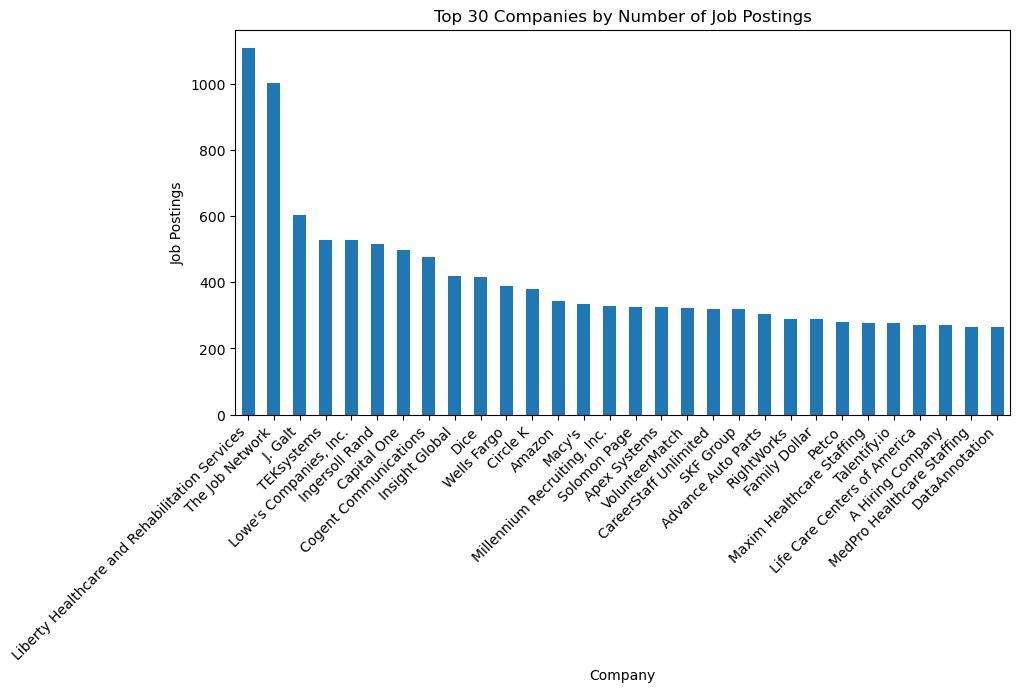

In [9]:
company_counts = (
    df.groupby("company_name")["job_id"]
      .nunique()
      .sort_values(ascending=False)
      .head(30)
)

company_counts.plot(kind="bar", figsize=(10,5))
plt.title("Top 30 Companies by Number of Job Postings")
plt.ylabel("Job Postings")
plt.xlabel("Company")
plt.xticks(rotation=45, ha="right")
plt.show()


#### TOP ROLES 

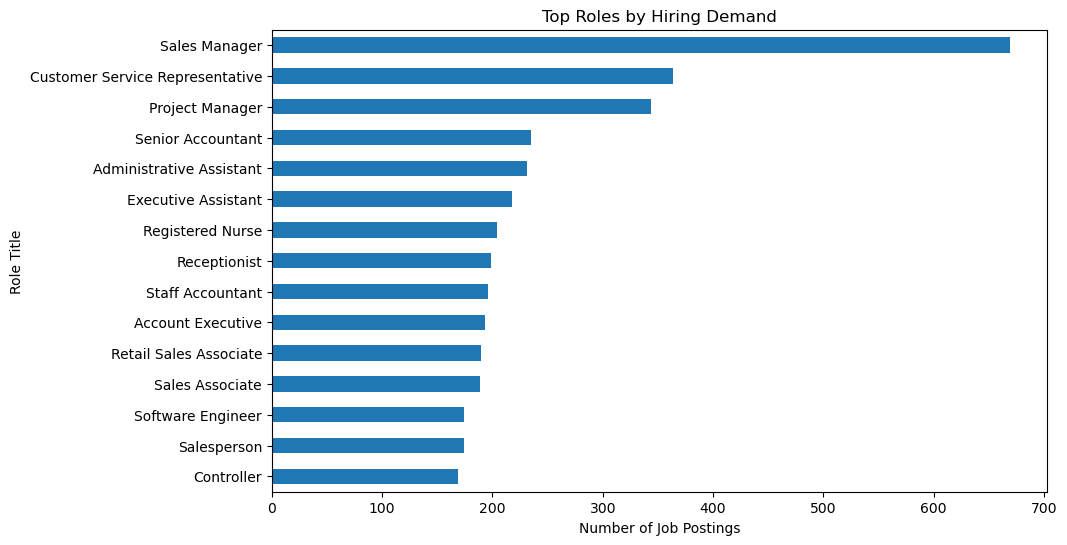

In [10]:
#top hiring roles based on no of job postings
role_demand = (
    df["role_title"]
    .value_counts()
    .head(15)
)
plt.figure(figsize=(10,6))
role_demand.sort_values().plot(kind="barh")
plt.title("Top Roles by Hiring Demand")
plt.xlabel("Number of Job Postings")
plt.ylabel("Role Title")
plt.show()


In [11]:
df.columns

Index(['company_id', 'company_name', 'job_id', 'role_title', 'description',
       'skills_desc', 'experience_level', 'max_salary', 'min_salary',
       'med_salary', 'normalized_salary', 'currency', 'compensation_type',
       'pay_period', 'work_type', 'location', 'remote_allowed', 'datetime',
       'views', 'applies', 'sponsored', 'annual_salary'],
      dtype='object')

In [12]:
df["monthly_salary_usd"] = pd.to_numeric(df["monthly_salary_usd"], errors="coerce")

KeyError: 'monthly_salary_usd'

In [11]:
# top hiring roles based on salary
df["monthly_salary_usd"] = pd.to_numeric(df["monthly_salary_usd"], errors="coerce")

# Aggregate by role
role_salary_demand = (
    df.dropna(subset=["monthly_salary_usd"])
      .groupby("role_title")
      .agg(
          job_count=("job_id", "count"),
          median_salary=("monthly_salary_usd", "median")
      )
      .reset_index()
)

# Salary-weighted demand score
role_salary_demand["salary_weighted_demand"] = (
    role_salary_demand["job_count"] * role_salary_demand["median_salary"]
)

# top 10 roles
top_roles = (
    role_salary_demand
    .sort_values("salary_weighted_demand", ascending=False)
    .head(10)
    .sort_values("salary_weighted_demand")
)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(
    top_roles["role_title"],
    top_roles["salary_weighted_demand"]
)
plt.title("Top Hired Roles Based on Monthly Salary in USD ")
plt.xlabel("Salary based Hiring Demand")
plt.ylabel("Role Title")
plt.tight_layout()
plt.show()


KeyError: 'monthly_salary_usd'

### Monthly salary distribution

In [ ]:
sns.histplot(df["monthly_salary_usd"], bins=40, kde=True)
plt.show()

In [ ]:
df["datetime"].dtype


In [ ]:
df["datetime"].head(5)


In [ ]:
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")


In [ ]:
df.dtypes

### Annual salary Distribution

In [ ]:
df_salary_clean = df[
    (df["annual_salary"] >= 15000) &
    (df["annual_salary"] <= 300000)
]
sns.histplot(df_salary_clean["annual_salary"], bins=50)
plt.show()


### Salary based on Experience level

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(
    data=df,
    x="experience_level",
    y="monthly_salary_usd",
    palette="Set2",
    hue=None
)
plt.title("Monthly Salary based on Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Monthly Salary (USD)")
plt.show()


In [ ]:
df["min_salary_usd"]


In [ ]:
df["max_salary_usd"]

In [ ]:
df["role_title"].unique()


In [ ]:
df["role_title"].value_counts()

In [ ]:
roles = [
    "Data Scientist",
    "Data Analyst",
    "Machine Learning Engineer"
]

df[df["role_title"].isin(roles)]


In [ ]:
df[df["role_title"] == "Data Scientist"][["monthly_salary_usd"]]


In [ ]:
numeric_cols = [
    "monthly_salary_usd",   # monthly salary of inetrns , contract, full time , part time 
    "views",
    "applies"
]


In [ ]:
corr = df[numeric_cols].corr()


In [ ]:
plt.figure(figsize=(6,4))

sns.heatmap(
    corr,
    annot=True,        # show numbers
    fmt=".2f",         # 2 decimal places (DISPLAY only)
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numberic cols")
plt.show()

In [ ]:
df["apply_rate"] = df["applies"] / df["views"]

In [ ]:
numeric_cols = [
    "monthly_salary_usd",
    "views",
    "applies",
    "apply_rate"
]
categorical_cols = [
    "experience_level",
    "remote_allowed",
    "work_type",
    "sponsored",
    "role_title"
]



In [ ]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(7,5))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap (Extended)")
plt.show()


In [ ]:
#Multiple experience level plot
plt.figure(figsize=(7,5))

sns.histplot(
    data=df,
    x="monthly_salary_usd",            # numeric
    hue="experience_level",    # categorical
    multiple="stack",
    bins=40,
)

plt.title("Salary Distribution by Experience Level")
plt.xlabel("Monthly Salary (USD)")
plt.ylabel("Count")
plt.show()


In [ ]:
#INDIVIDUAL EXPERIENCE LEVEL PLOT
sns.histplot(
    data=df[df["experience_level"] == "Mid-Senior level"],
    x="monthly_salary_usd",
    bins=40
)
plt.show()

In [ ]:
# Define a color palette function for different colors
for col in categorical_cols:
    if col == "role_title":
        continue   # skip role_title
    plt.figure(figsize=(6, 4))
    
    sns.countplot(
        data=df,
        x=col,
        hue=col,              # same column for coloring
        palette="husl",
        legend=False
    )
    
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.tight_layout()
    plt.show()



In [ ]:
#custom_palette = {0: "#3b0f70", 1: "#fe9f6d"}  # adjust if your values are True/False
custom_palette = {
    "Yes": "#3b0f70",
    "N/A": "#fe9f6d"
}

plt.figure(figsize=(12, 6))
sns.histplot(
    data=df,
    x="monthly_salary_usd",
    hue="remote_allowed",
    multiple="stack",
    bins=40,
    kde=True,
    palette=custom_palette
)
plt.title("Monthly Salary Distribution by Remote Availability")
plt.tight_layout()
plt.show()


In [ ]:
custom_palette = {
    "Internship": "#3b0f70",
    "Entry level": "#fe9f6d",
    "Associate": "#7ad151",
    "Mid-Senior level": "#22a884",
    "Director": "#2a788e",
    "Executive": "#414487"
}
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df,
    x="monthly_salary_usd",
    hue="experience_level",
    multiple="stack",
    bins=40,
    kde=True,
    palette=custom_palette
)
plt.title("Monthly Salary Distribution by Experience Level")
plt.tight_layout()
plt.show()


In [ ]:
# Define custom palette
custom_palette = {
    "Internship": "#3b0f70",
    "Entry level": "#5c4d9a",
    "Associate": "#7f7fd5",
    "Mid-Senior level": "#fe9f6d",
    "Director": "#d95f02",
    "Executive": "#1b9e77"
}

# Optional but recommended for big data
pair_df = df[
    numeric_cols + ["experience_level"]
].dropna()

# Create the pairplot

sns.pairplot(
    data=pair_df.dropna(),
    vars=numeric_cols,
    hue="experience_level",
    palette=custom_palette,
    diag_kind="kde",
    corner=True,
    height=3.5,          #  increases subplot size
    aspect=1.2,
    plot_kws={"alpha": 0.4}
)

plt.suptitle(
    "Pairwise Relationships: Salary, Views & Applies by Experience Level",
    y=1.02,
    fontsize=16
)

plt.show()

# Add a title with spacing
plt.suptitle("Pairwise Relationships", y=1.02, fontsize=16)
plt.show()

In [ ]:
#log-transformation to address skewness, reduce the effect of outliers, and stabilize variance

# choose numeric vars (keep it small for readability)
numeric_cols = [c for c in ["monthly_salary_usd", "views", "applies"] if c in df.columns]

pair_df = df[numeric_cols + ["experience_level"]].copy()

# log-scale to reduce skew (handles zeros)
for col in numeric_cols:
    pair_df[col] = np.log10(pd.to_numeric(pair_df[col], errors="coerce").clip(lower=1))

pair_df = pair_df.dropna()

sns.pairplot(
    data=pair_df,
    vars=numeric_cols,
    hue="experience_level",
    diag_kind="kde",
    corner=True,
    height=3.5,
    plot_kws={"alpha": 0.35, "s": 18}
)

plt.suptitle("Pairplot (Log-Scaled): Salary, Views & Applies by Experience Level", y=1.02, fontsize=14)
plt.show()


In [ ]:
#pairplot based on experience levels
numeric_cols = ["monthly_salary_usd", "views", "applies", "apply_rate"]
hue_col = "experience_level"

pair_df = df[numeric_cols + [hue_col]].dropna()
pair_df = pair_df.sample(min(len(pair_df), 10000), random_state=42)

# Color palette
levels = sorted(pair_df[hue_col].astype(str).unique())
palette_list = sns.color_palette("rocket", n_colors=len(levels))  # purple → pink
custom_palette = dict(zip(levels, palette_list))

sns.pairplot(
    data=pair_df,
    vars=numeric_cols,
    hue=hue_col,
    palette=custom_palette,
    diag_kind="kde",
    corner=True,
    plot_kws={"alpha": 0.35, "s": 12}
)

plt.suptitle(
    "Pairwise Relationships (Experience Level)",
    y=1.02,
    fontsize=16
)
plt.show()


In [ ]:
# Boxplot of max_salary by experience (log scale)
palette = {
    "Internship": "#1b9e77",
    "Entry level": "#66c2a5",
    "Associate": "#9e9ac8",
    "Mid-Senior level": "#e78ac3",
    "Director": "#a6d854",
    "Executive": "#ffd92f"
}

sns.boxplot(
    data=df,
    x="experience_level",
    y="monthly_salary_usd",
    palette = palette
)
plt.yscale("log")
plt.title("Monthly Salary by Experience Level (log scale)")
plt.xticks(rotation=45)
plt.show()


In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, col in zip(axes, ["monthly_salary_usd", "views", "applies"]):
    ax.boxplot(df[col].dropna())
    ax.set_yscale("log")
    ax.set_title(f"Boxplot of {col} (log scale)")

plt.tight_layout()
plt.show()

In [ ]:
#Pairplot based on salary(<=50K, 50K–100K, >100K)
numeric_cols = ["monthly_salary_usd", "views", "applies", "apply_rate"] 
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, col in zip(axes, ["monthly_salary_usd", "views", "applies"]):
    ax.boxplot(df[col].dropna())
    ax.set_yscale("log")
    ax.set_title(f"Boxplot of {col} (log scale)")

plt.tight_layout()
plt.show()

df["salary_bucket"] = pd.cut(
    df["monthly_salary_usd"],
    bins=[-np.inf, 50000, 100000, np.inf],
    labels=["<=50K", "50K–100K", ">100K"]
)
#  Build pair_df
pair_df = df[numeric_cols + ["salary_bucket"]].dropna()

# Optional: sample for speed (recommended)
pair_df = pair_df.sample(min(len(pair_df), 10000), random_state=42)

#custom palette
custom_palette = {
    "<=50K": "#3b0f70",     # deep purple
    "50K–100K": "#9e9ac8",  # lavender
    ">100K": "#f768a1"      # pink
}
# Pairplot
sns.pairplot(
    data=pair_df,
    vars=numeric_cols,
    hue="salary_bucket",
    palette=custom_palette,
    diag_kind="kde",
    corner=True,
    plot_kws={"alpha": 0.35, "s": 12}
)

plt.suptitle(
    "Pairwise Relationships (colored by Salary Bucket)",
    y=1.02,
    fontsize=16
)
plt.show()


### Hiring demand in US States

In [ ]:
import re

def extract_state(loc):
    if pd.isna(loc):
        return None
    match = re.search(r",\s*([A-Z]{2})$", str(loc))
    return match.group(1) if match else None

df["state"] = df["location"].apply(extract_state)


In [ ]:
df["state"].value_counts().head(10)


In [ ]:
state_jobs = (
    df.groupby("state")
      .size()
      .reset_index(name="job_postings")
      .sort_values("job_postings", ascending=False)
)

state_jobs.head(10)


In [ ]:
state_views = (
    df.groupby("state")["views"]
      .sum()
      .reset_index(name="total_views")
      .sort_values("total_views", ascending=False)
)

state_views.head(10)


In [ ]:
state_applies = (
    df.groupby("state")["applies"]
      .sum()
      .reset_index(name="total_applies")
      .sort_values("total_applies", ascending=False)
)

state_applies.head(10)


In [ ]:

top_n = 15
plot_df = state_jobs.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x="job_postings", y="state")
plt.title(f"Top {top_n} States by Job Postings")
plt.xlabel("Number of Job Postings")
plt.ylabel("States")
plt.tight_layout()
plt.show()


In [ ]:
df.columns

In [ ]:
state_jobs.columns

In [ ]:
plot_df.head()

In [ ]:
# Build a clean 'state_code' from location/state text
s = df.get("location", df.get("state", pd.Series(index=df.index, dtype="object"))).astype(str).str.strip()

state_map = {
    "AL":"Alabama","AK":"Alaska","AZ":"Arizona","AR":"Arkansas","CA":"California","CO":"Colorado","CT":"Connecticut",
    "DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","ID":"Idaho","IL":"Illinois","IN":"Indiana","IA":"Iowa",
    "KS":"Kansas","KY":"Kentucky","LA":"Louisiana","ME":"Maine","MD":"Maryland","MA":"Massachusetts","MI":"Michigan",
    "MN":"Minnesota","MS":"Mississippi","MO":"Missouri","MT":"Montana","NE":"Nebraska","NV":"Nevada","NH":"New Hampshire",
    "NJ":"New Jersey","NM":"New Mexico","NY":"New York","NC":"North Carolina","ND":"North Dakota","OH":"Ohio","OK":"Oklahoma",
    "OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota","TN":"Tennessee","TX":"Texas",
    "UT":"Utah","VT":"Vermont","VA":"Virginia","WA":"Washington","WV":"West Virginia","WI":"Wisconsin","WY":"Wyoming","DC":"District of Columbia"
}
names_pat = r"\b(" + "|".join([re.escape(v) for v in state_map.values()]) + r")\b"
abbr_pat  = r"(?:,|\s)\s*([A-Z]{2})(?:\s|$)"

df_plot = df.copy()
df_plot["state_code"] = s.str.extract(abbr_pat, expand=False)
df_plot.loc[df_plot["state_code"].isna(), "state_code"] = (
    s.str.extract(names_pat, expand=False).map({v:k for k,v in state_map.items()})
)

# Keep only valid US state codes
df_plot = df_plot[df_plot["state_code"].isin(state_map.keys())].copy()

# Clean salary + cap outliers 
#(capped => Limit very large salary values to a maximum threshold so they don’t distort the analysis)
df_plot["monthly_salary_usd"] = pd.to_numeric(df_plot["monthly_salary_usd"], errors="coerce")
df_plot = df_plot.dropna(subset=["max_salary"])

cap = df_plot["monthly_salary_usd"].quantile(0.99)
df_plot["salary_capped"] = df_plot["monthly_salary_usd"].clip(upper=cap)

# --- 3) Plot: Top 15 states by job count, median salary (readable) ---
top_states = df_plot["state_code"].value_counts().head(15).index
summary = (df_plot[df_plot["state_code"].isin(top_states)]
           .groupby("state_code")["salary_capped"]
           .median()
           .sort_values())

plt.figure(figsize=(10, 6))
summary.plot(kind="barh")
plt.title("Monthly Salary depending on State")
plt.xlabel("Monthly Salary")
plt.ylabel("State")
plt.tight_layout()
plt.show()


#### Roles with largest minimum to maximum salary spread

In [ ]:
df_salary = df.dropna(subset=["min_salary_usd", "max_salary_usd"]).copy()

role_salary_spread = (
    df_salary
    .groupby("role_title")
    .agg(
        min_usd=("min_salary_usd", "min"),
        max_usd=("max_salary_usd", "max"),
        median_monthly=("monthly_salary_usd", "median"),
        job_count=("job_id", "count")
    )
    .reset_index()
)

role_salary_spread["salary_spread"] = role_salary_spread["max_usd"] - role_salary_spread["min_usd"]


In [ ]:
role_salary_spread = role_salary_spread[role_salary_spread["job_count"] >= 30]


In [ ]:
top_spread_roles = (
    role_salary_spread
    .sort_values("salary_spread", ascending=False)
    .head(10)
    .sort_values("salary_spread")
)

plt.figure(figsize=(10, 6))
plt.barh(
    top_spread_roles["role_title"],
    top_spread_roles["salary_spread"]
)
plt.title("Roles with Largest Min–Max Salary Spread")
plt.xlabel("Salary Spread (Max − Min)")
plt.ylabel("Role Title")
plt.tight_layout()
plt.show()


In [ ]:
df["datetime"]

In [ ]:
#plotly
fig = px.box(
    df,
    x="experience_level",
    y="monthly_salary_usd",
    points="outliers",
    title="Monthly Salary Distribution by Experience Level"
)
fig.show()


In [ ]:
fig = px.violin(
    df,
    x="work_type",
    y="monthly_salary_usd",
    box=True,
    points="outliers",
    title="Monthly Salary by Work Type"
)
fig.show()


In [ ]:
import plotly.io as pio
pio.renderers.default = "iframe"

top_roles = (
    df.groupby("role_title", as_index=False)["monthly_salary_usd"]
      .mean()
      .sort_values("monthly_salary_usd", ascending=False)
      .head(15)
)

fig = px.bar(
    top_roles,
    x="monthly_salary_usd",
    y="role_title",
    orientation="h",
    title="Top 15 Roles by Average Monthly Salary"
)
fig.show()
